<a href="https://colab.research.google.com/github/PiyawatFrom/practices/blob/main/Week2_Q6_Healthy_Diet_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign**

**จากข้อ 5**  ( อ้างอิง : https://colab.research.google.com/drive/196cBbkcHGXYcnKkLBLuHnSJjaIjbplBJ )

ให้ผู้เรียน ตั้งสมมุติฐานว่า ถ้าเราอยากจะขาย “อาหารสุขภาพ” ให้กับคนกลุ่มนี้

ให้มีประสิทธิภาพสูงสุด เราจะต้องรู้อะไรจากข้อมูลชุดนี้อีก

source : https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

V2 : https://colab.research.google.com/drive/1L7zj1mC0zJGvxSbV-rQN6qCwhI1GsCQ7#scrollTo=7Sae4yeCel33

In [1]:
!pip install pycaret
!pip install --upgrade pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **จัดเตรียมข้อมูล**

In [5]:
q6_path = 'gdrive/MyDrive/Data Master Class/Week 2 Tools for Data Sci/Week 2 material and code/week02/marketing_campaign.csv'
mkCamp = pd.read_table(q6_path)
mkCamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
mkCamp.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1274,7527,1968,Master,Divorced,23748.0,1,0,21-11-2012,97,6,...,8,0,0,0,0,0,0,3,11,0
1202,3602,1958,Master,Married,51412.0,0,1,31-12-2013,42,140,...,4,0,0,0,0,0,0,3,11,0
294,10451,1965,Graduation,Together,29672.0,1,1,12-03-2013,6,9,...,6,0,0,0,0,0,0,3,11,0
1997,10841,1975,PhD,Together,56559.0,0,1,25-12-2012,46,226,...,4,0,0,0,0,0,0,3,11,0
1716,10091,1956,Graduation,Single,60230.0,0,1,20-05-2013,78,520,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df = mkCamp.copy()

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [13]:
#คำนวณอายุ ณ ปี 2023
df['Age'] = 2023 - df['Year_Birth']
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Z_CostContact และ Z_Revenue ควรเอาออก เพราะมีแต่สมาชิกซ้ำทุกตัว

In [19]:
df = df[['ID', 'Year_Birth','Dt_Customer','Age', 'Education',
                'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2', 'Complain','Response']] #ถือโอกาสจัดเรียง column ไปในตัว
df.columns

Index(['ID', 'Year_Birth', 'Dt_Customer', 'Age', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# **ลองจัดกลุ่มด้วย PyCarat โดยดูเฉพาะอาหาร**

ref : https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform

In [20]:
food_products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts','MntGoldProds']
df2 = df[food_products].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2240 non-null   int64
 1   MntFruits         2240 non-null   int64
 2   MntMeatProducts   2240 non-null   int64
 3   MntFishProducts   2240 non-null   int64
 4   MntSweetProducts  2240 non-null   int64
 5   MntGoldProds      2240 non-null   int64
dtypes: int64(6)
memory usage: 105.1 KB


In [21]:
df2.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


<Axes: ylabel='Density'>

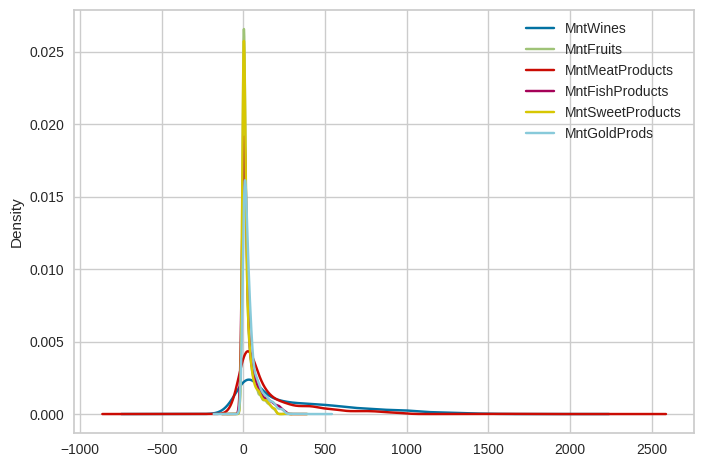

In [23]:
df2.plot.kde()

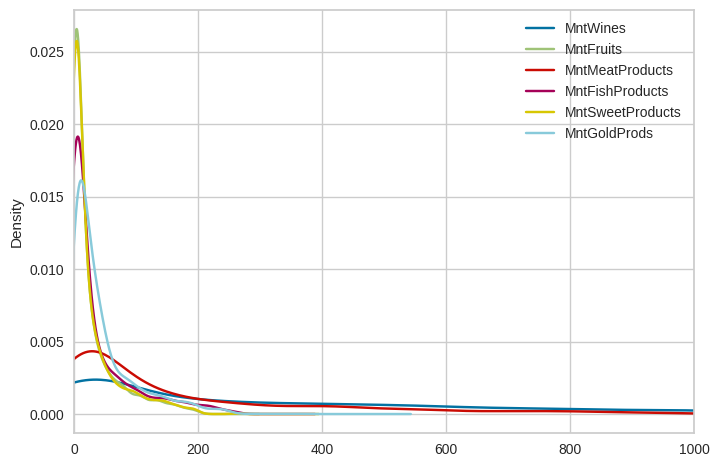

In [25]:
ax = df2.plot.kde()

ax.set_xlim(0, 1000)

plt.show()

In [24]:
df2.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


มีลักษณะที่ใกล้เคียง right skewed distribution

In [22]:
from pycaret.clustering import *

In [26]:
setup_df = setup(data=df2,normalize=True,normalize_method='minmax' ,
                 transformation=True ,session_id = 43)

,Description,Value
0,Session id,43
1,Original data shape,"(2240, 6)"
2,Transformed data shape,"(2240, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Transformation,True
9,Transformation method,yeo-johnson


## **K-Means**

In [27]:
MC_kmean_model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2936,1495.3678,1.3301,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

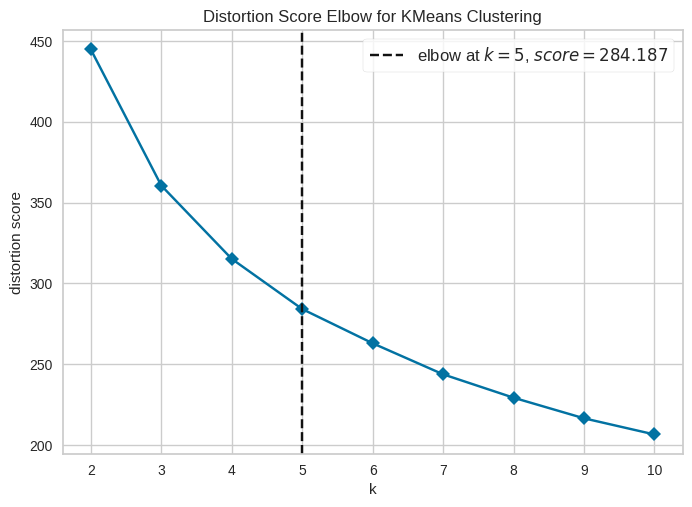

In [28]:
plot_model(MC_kmean_model, 'elbow')

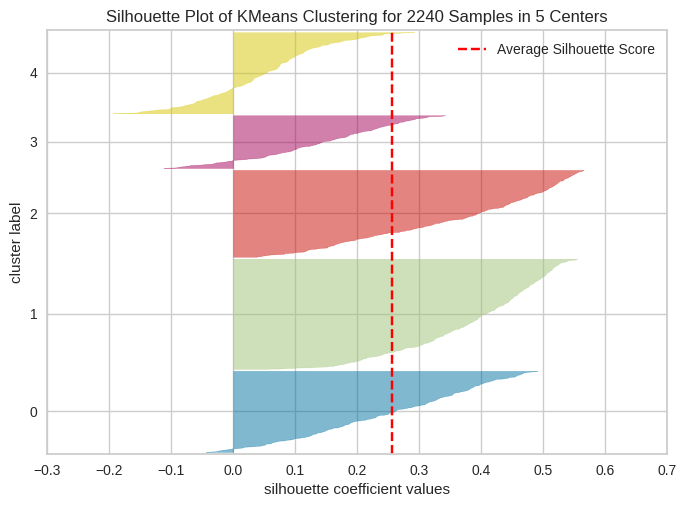

In [35]:
plot_model(MC_kmean_model, plot = 'silhouette')

In [58]:
MC_kmean_model = create_model('kmeans',num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2558,1304.5315,1.4242,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
plot_model(MC_kmean_model, 'cluster')

In [60]:
MC_kmean_results = assign_model(MC_kmean_model)
MC_kmean_results.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Cluster
0,635,88,546,172,88,88,Cluster 1
1,11,1,6,2,1,6,Cluster 2
2,426,49,127,111,21,42,Cluster 1
3,11,4,20,10,3,5,Cluster 0
4,173,43,118,46,27,15,Cluster 4


In [61]:
MC_kmean_results['Cluster'].unique()

array(['Cluster 1', 'Cluster 2', 'Cluster 0', 'Cluster 4', 'Cluster 3'],
      dtype=object)

## **วิเคราะห์ Cluster ที่ได้**

In [62]:
MC_Clus = MC_kmean_results
MC_Clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MntWines          2240 non-null   int32 
 1   MntFruits         2240 non-null   int32 
 2   MntMeatProducts   2240 non-null   int32 
 3   MntFishProducts   2240 non-null   int32 
 4   MntSweetProducts  2240 non-null   int32 
 5   MntGoldProds      2240 non-null   int32 
 6   Cluster           2240 non-null   object
dtypes: int32(6), object(1)
memory usage: 70.1+ KB


In [63]:
#เปลี่ยนประเภทเป็น Category
cat_col = list(MC_Clus.select_dtypes(include="O").columns)
MC_Clus[cat_col] = MC_Clus[cat_col].astype('category')
MC_Clus.dtypes

MntWines               int32
MntFruits              int32
MntMeatProducts        int32
MntFishProducts        int32
MntSweetProducts       int32
MntGoldProds           int32
Cluster             category
dtype: object

In [64]:
# MC_Clus.groupby('Cluster').describe().T.style.background_gradient(axis=1,cmap='PuRd')
MC_Clus.groupby('Cluster').agg(['min','max','mean','median']).T.style.background_gradient(axis=1,cmap='PuRd')

<Axes: xlabel='Cluster'>

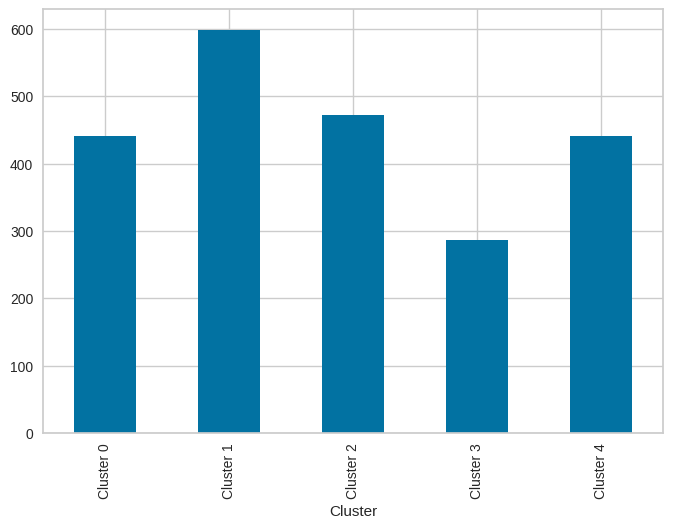

In [67]:
MC_Clus.groupby('Cluster').size().plot.bar()

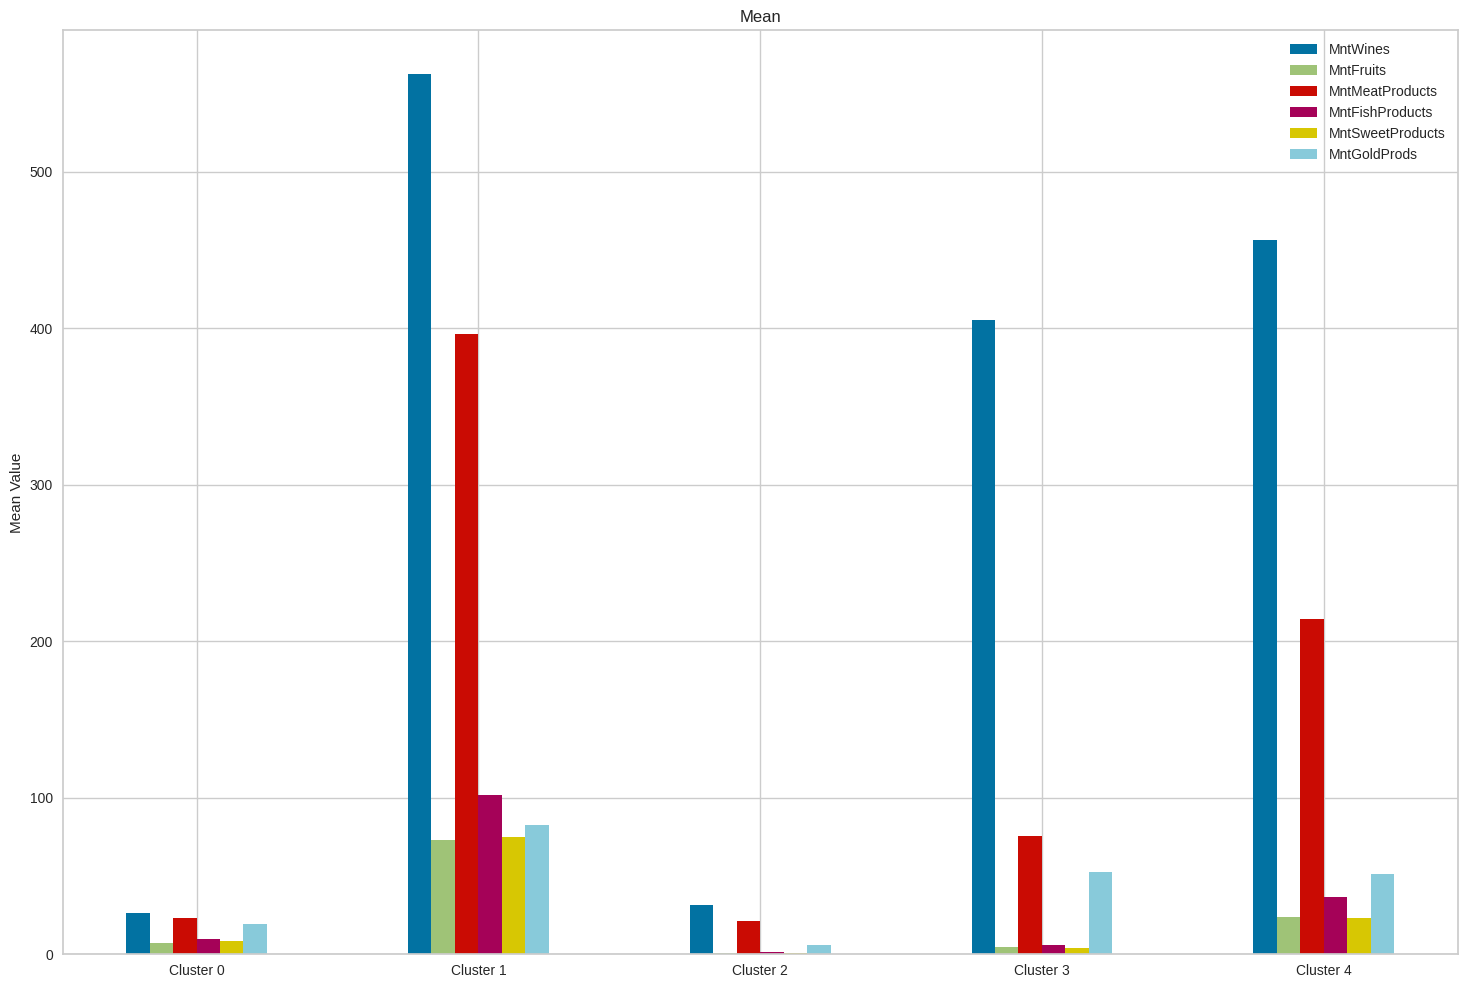

In [65]:
prod_type = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
             'MntSweetProducts','MntGoldProds']
mean_df = MC_Clus.groupby('Cluster')[prod_type].mean()

# Plot bar chart
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(18, 12))
mean_df.plot(kind='bar', y=prod_type, ax=ax)

plt.title('Mean')
plt.ylabel('Mean Value')
plt.xlabel('')
# ax.set_yscale('log')

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.autoscale()
plt.show()

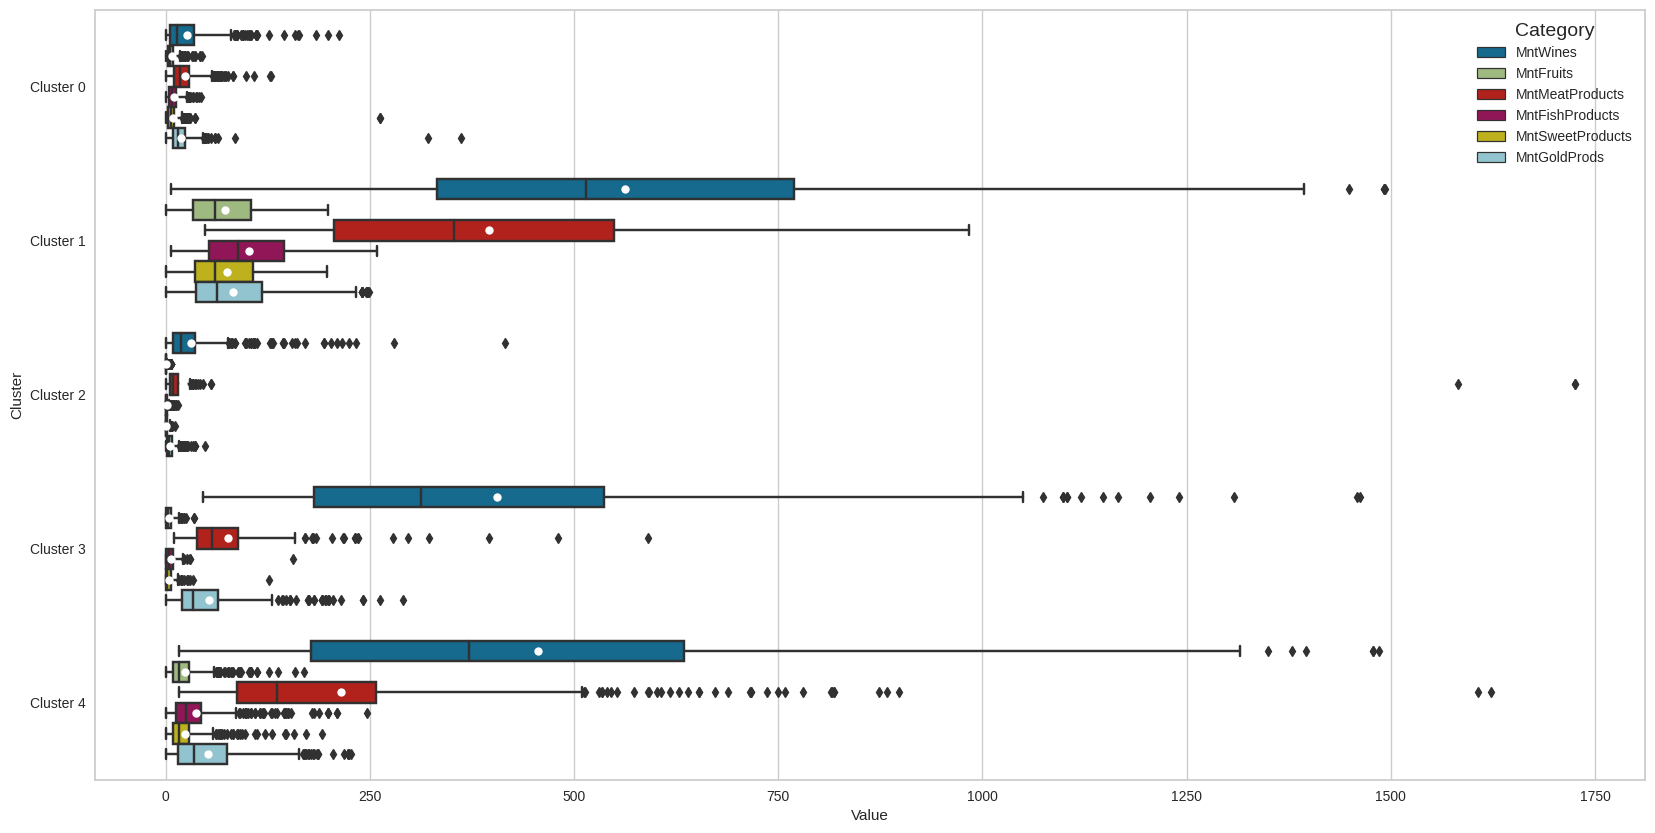

In [66]:
# Melt the data to create a long-form DataFrame with 'Category' as a column
melted_df = MC_Clus.melt(id_vars=['Cluster'], value_vars=prod_type,
                     var_name='Category', value_name='Value')

# Create a boxplot using seaborn
plt.figure(figsize=(20, 10))
meanprop_shape = {"marker":"o","markerfacecolor":"white","markeredgecolor":"black"}
sns.boxplot(y='Cluster', x='Value', hue='Category', data=melted_df,
            showmeans = True , meanprops = meanprop_shape)

plt.ylabel('Cluster')
plt.xlabel('Value')

plt.show()

**ข้อสรุป** : ค่อนข้างยากแก่การจัดกลุ่ม แต่ถ้าจากผลลัพท์ที่ได้คลัสเตอร์ที่น่าสนใจคือคลัสเตอร์ที่ 1
เพราะเมื่อเทียบกับคลัสเตอร์อื่นๆ แล้วมีการบริโภคเนื้อสัตว์ที่สูงกว่าและบริโภคน้ำตาลที่น้อยกว่า

**ดังนั้น** จากการคาดเดา คาดว่ากลุ่มที่ 1 นี้น่าจะจัดอยู่ในหมวดหมู่คนรักสุขภาพ

**ปัญหา** : หาข้อสรุปเกี่ยวกับการบริโภคไวน์ที่สูงในทุกๆ กลุ่มไม่ได้